## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

In [26]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy import interpolate
from scipy.interpolate import interp1d

# Librarie for hypothesis testing:
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind
from scipy.stats import f_oneway

from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import binom

In [27]:
# your answer here
def pm_function (x):
    expected_var = poisson.pmf(x, 2.435) * 448
    return expected_var

x_1 = [0,1,2,3,4,5,6,7]
y_1 = [35,99,104,110,62,25,10,3]


In [28]:
expected_var_1 = pm_function(x_1)
expected_var_1

array([ 39.24379068,  95.5586303 , 116.34263239,  94.43143662,
        57.48513704,  27.99526174,  11.36141039,   3.95214776])

In [29]:
observed_values=scipy.array(y_1)
expected_values=scipy.array(expected_var_1)

stats.chisquare(observed_values, f_exp=expected_values)

Power_divergenceResult(statistic=5.526588649191276, pvalue=0.5959787428784398)

In [30]:
# P value = 0.59, so in the 95% interval. This means that it´s the 95% interval.

In [31]:
# Explanation for own purposes:

# poisson.pmf(1, 2.435) # (= total)
# Probablity of getting a 1 in Poisson distribution is:
# poisson.pmf(1, mean)
# poisson.pmf(1, mean) * n : this is the expected frequency with the sample of n values.

# Observed values: these are the actual frequencies of the table
# expected values: the items calculated.


In [32]:
# The Poisson Distribution is used to predict how many times something might happen in a specific timeframe.
# Since this is a prediction of the scores in a timeframe, the Poisson distribution can be used.


## Question 2
The following are the ordered values of a random sample of SAT scores (university entrance exam) for several students: 852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063. In previous years, the scores were presented by N (985,50). Based on the sample, is there any reason to believe that there has been a change in the distribution of scores this year? Use the level alpha = 0.05. 

In [33]:
# your answer here

SAT_scores = [852, 875, 910, 933, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063]

ttest_1samp(SAT_scores, 985.50)

# Since the p value is over 2.5%, it means that the scores mean is still in the 95% confidence interval.
# This means that there has not been a change of distribution of scores.

Ttest_1sampResult(statistic=-0.29971364866767636, pvalue=0.7691339743827507)

## Question 3
Let's analyze a discrete distribution. To analyze the number of defective items in a factory in the city of Medellín, we took a random sample of n = 60 articles and observed the number of defectives in the following table:

![](table4.png)

A poissón distribution was proposed since it is defined for x = 0,1,2,3, .... using the following model:

![](image1.png)

Does the distribution of defective items follow this distribution?

In [34]:
# your code here:

def pm_function (x):
    expected_var = poisson.pmf(x, 1.0) * 60
    return expected_var

x_2 = [0,1,3,4]
y_2 = [32,15,9,4]

expected_var_2 = pm_function(x_2)
expected_var_2

array([22.07276647, 22.07276647,  3.67879441,  0.9196986 ])

In [35]:
observed_values=scipy.array(y_2)
expected_values=scipy.array(expected_var_2)

stats.chisquare(observed_values, f_exp=expected_values)

Power_divergenceResult(statistic=24.744679196961386, pvalue=1.7459633255895265e-05)

In [36]:
# P value is very low, therefore H0 can be rejected, which means that we cannot prove that the distributions are the same.
# So the defective items don´t follow the Poisson distribution.

## Question 4
A quality control engineer takes a sample of 10 tires that come out of an assembly line, and would like to verify on the basis of the data that follows, if the number of tires with defects observed over 200 days, if it is true that 5% of all tires have defects (that is, if the sample comes from a binomial population with n = 10 and p = 0.05). 

![](table6.png)


In [41]:
# your answer here:
x_3 = [0,1,2]
y_3 = [138, 53, 9]

n = 10
p = 0.05
k = x_3

def pm_function_binom (x):
    expected_var_3 = binom.pmf(k,n,p) * 200
    return expected_var_3

In [42]:
expected_var_3 = pm_function_binom(x_3)
expected_var_3

array([119.74738785,  63.02494097,  14.9269597 ])

In [43]:
observed_values=scipy.array(y_3)
expected_values=scipy.array(expected_var_3)

stats.chisquare(observed_values, f_exp=expected_values)

Power_divergenceResult(statistic=6.730152995610064, pvalue=0.034559372300758)

In [ ]:
# P value is low, therefore H0 can be rejected (with a 95% confidence interval), which means that we cannot prove that the distributions are the same.
# So the defective items don´t follow the Binomial distribution.
# Therefore we cannot say that 5% of all tires have defects.

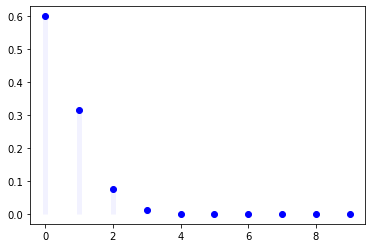

In [30]:
# Below are scraps, please disregard.

# Binomial: how many consecutive items in a time window can we get. 
# importing libraries
%matplotlib inline
from scipy import stats
from scipy.stats import binom

n=10
p=0.05

# Initialization:
binomial = binom(n,p)

# Getting the simulation of the data with n= 10:

x = np.arange(0,10)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.05)

# Based on the below graph, the probability of getting a defect is 0.3, so it´s less than 5 %

(array([6., 0., 0., 3., 0., 0., 0., 0., 0., 1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

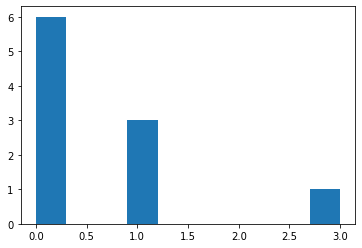

In [31]:
x = binomial.rvs(10)
plt.hist(x)

## Question 5
A researcher gathers information about the patterns of physical activity (AF) of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (1 = Low, 2 = Medium, 3 = High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (1 = consumed, 0 = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table5.png)

In [64]:
#your answer here
# H0 hypothesis is that there is a relation between the two variables.
# Since you have a contingency table, you can do a Chi square test
# Observed values are the ones in the contingency table
# Expected values: multiply the items of total Si with Total baja and divide by grand total
# The items have to be in order baja si/no (to make sure that the lists are comparable)
# Calculate the degrees of freedom, which in this case is columns -1 * rows -1 (=2)
# Then use the Chi Square test
# Expected variables (theoretical var) and observed variabla (statistical/measured variable)

#def expected_val_func (x_list, y_list):
    #expected_values = [(x * y)/95 for x in x_list]
    #return expected_values

x_list = [52,43]
y_list = [44,36,15]
n = 2
n_1 = 3

In [69]:
observed_values = [32,12,14,22,6,9]
expected_values = [24,20,20,16,8,7]

# Calculating the degrees of freedom
dof = (n-1) * (n_1 -1)
dof

# Using the Chi Square Test

from math import pow
chi2 = sum(pow(expected_values[i]-observed_values[i],2)/expected_values[i] for i in range(len(observed_values)))

from scipy.stats import chi2
critical_value = chi2.ppf(q=1-0.05, df=dof)
critical_value

# I´m still not sure about what I´m doing (very sorry :(

5.991464547107979